**Predicción de popularidad de temas musicales**

Se implementa modelos de machine learning para la predicción de popularidad de temas musicales o canciones en base a sus características de su elaboración. Siendo el modelo principal Random Forest y los modelos para comparar los resultados, como Regresioón Logistica y XGBoost.

**Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler

**Cargar el dataset**

In [2]:
dfa = pd.read_csv('data.csv')
dfa.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


Para propósitos de este proyecto se elimina el indentificador o Id, ya que no se hará utilización del mismo.

In [3]:
df = dfa.drop(columns=['track_id'])
df.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


**Verificación y limpieza de datos**

Se visualiza si hay valores nulos

In [4]:
df.isnull().sum()

genre               0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Dado que no hay valores nulos, no hay necesidad de aplicar ningun método de imputación.

In [5]:
#Visualización de las columnas 
df.columns

Index(['genre', 'artist_name', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence'],
      dtype='object')

In [6]:
#Tipos de datos de las columnas
pd.DataFrame(df.dtypes, columns=['DataType'])

,DataType
genre,object
artist_name,object
track_name,object
popularity,int64
acousticness,float64
danceability,float64
duration_ms,int64
energy,float64
instrumentalness,float64
key,object


**Analisis Exploratorio**

In [7]:
#Verificamos el coeficiente de correlación del conjunto de entrada
df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.422083,0.294233,-0.041150,0.277652,-0.230042,-0.203147,0.413276,-0.194673,0.114957,0.119224
acousticness,-0.422083,1.000000,-0.379441,0.035410,-0.723150,0.323748,0.086149,-0.698187,0.165105,-0.241385,-0.335430
danceability,0.294233,-0.379441,1.000000,-0.116437,0.338110,-0.360938,-0.034043,0.451336,0.135728,0.018950,0.542405
duration_ms,-0.041150,0.035410,-0.116437,1.000000,-0.058045,0.094618,0.006760,-0.068716,-0.017621,-0.027957,-0.135970
energy,0.277652,-0.723150,0.338110,-0.058045,1.000000,-0.388705,0.182697,0.816640,0.141294,0.228067,0.449463
instrumentalness,-0.230042,0.323748,-0.360938,0.094618,-0.388705,1.000000,-0.131840,-0.517373,-0.173734,-0.108424,-0.301990
liveness,-0.203147,0.086149,-0.034043,0.006760,0.182697,-0.131840,1.000000,0.035792,0.519542,-0.055556,0.018264
loudness,0.413276,-0.698187,0.451336,-0.068716,0.816640,-0.517373,0.035792,1.000000,-0.008912,0.229110,0.407057
speechiness,-0.194673,0.165105,0.135728,-0.017621,0.141294,-0.173734,0.519542,-0.008912,1.000000,-0.085619,0.035007
tempo,0.114957,-0.241385,0.018950,-0.027957,0.228067,-0.108424,-0.055556,0.229110,-0.085619,1.000000,0.120573


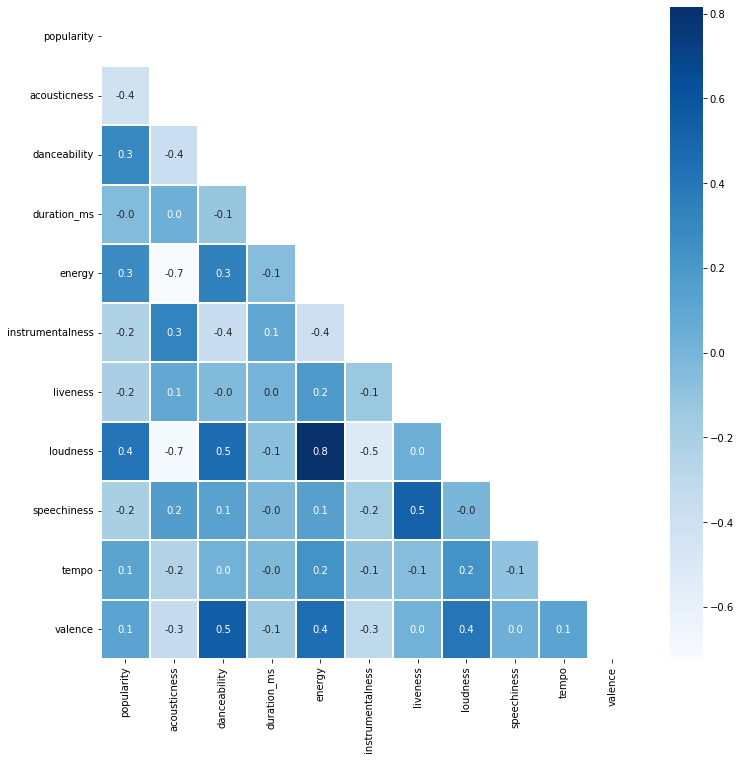

In [8]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

Text(0.5, 1.0, 'Popularidad Basada en Time Signature')

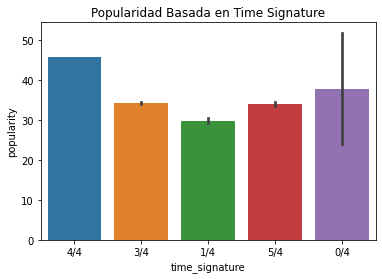

In [9]:
#Visualizacion de datos de las varibles categóricas
sns.barplot(x = 'time_signature', y = 'popularity', data = df)
plt.title('Popularidad Basada en Time Signature')

Text(0.5, 1.0, 'Popularidad Basada en Key')

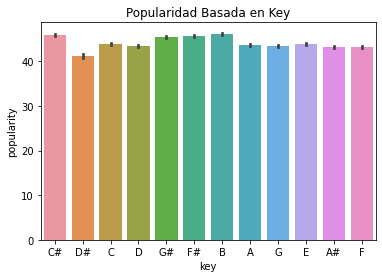

In [10]:
sns.barplot(x = 'key', y = 'popularity', data = df)
plt.title('Popularidad Basada en Key')

Text(0.5, 1.0, 'Popularidad Based en Mode')

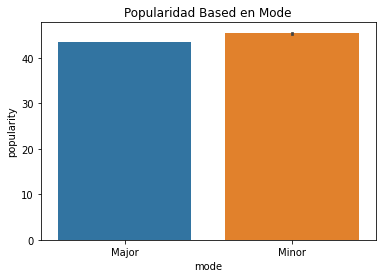

In [11]:
sns.barplot(x = 'mode', y = 'popularity', data = df)
plt.title('Popularidad Based en Mode')

**Ingeniería de características**

Para propósitos del modelo, se define por encima de 57 como "popular" ya que ese es el límite del 25 % de las mejores canciones y lo codificaremos como 1, y por debajo de 75% como "no popular" y lo codificaremos como 0.

In [12]:
df['popularity'].describe()

count    228159.000000
mean         44.209130
std          17.276599
min           0.000000
25%          33.000000
50%          47.000000
75%          57.000000
max         100.000000
Name: popularity, dtype: float64

<AxesSubplot:xlabel='popularity', ylabel='Count'>

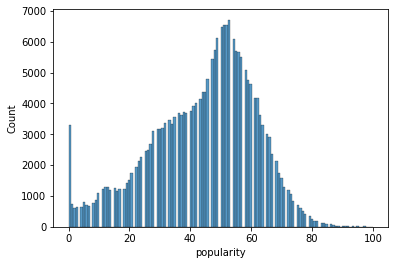

In [13]:
#histograma para ver la distribución de las puntuaciones de popularidad en el conjunto de datos.
sns.histplot(df['popularity'], bins='auto')

In [14]:
df.loc[df['popularity'] < 57, 'popularity'] = 0 
df.loc[df['popularity'] >= 57, 'popularity'] = 1
df.loc[df['popularity'] == 1]

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
242,Alternative,Joji,SLOW DANCING IN THE DARK,1,0.54400,0.5150,209274,0.4790,0.005980,D#,0.1910,-7.458,Major,0.0261,88.964,4/4,0.2840
243,Alternative,YUNGBLUD,11 Minutes (with Halsey feat. Travis Barker),1,0.01160,0.4640,239507,0.8520,0.000000,B,0.1080,-3.804,Major,0.0670,160.075,4/4,0.2330
244,Alternative,H.E.R.,Best Part (feat. Daniel Caesar),1,0.79500,0.4730,209400,0.3710,0.000000,E,0.1090,-10.219,Minor,0.0405,75.208,4/4,0.4130
245,Alternative,Joji,YEAH RIGHT,1,0.61900,0.6720,174358,0.5880,0.241000,C#,0.0992,-9.573,Major,0.1330,169.033,4/4,0.2040
246,Alternative,H.E.R.,Could've Been (feat. Bryson Tiller),1,0.64000,0.5450,248467,0.3300,0.000007,C#,0.2200,-11.719,Minor,0.1640,103.553,4/4,0.3990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221649,World,Kemuel,Oh Quão Lindo Esse Nome É (What a Beautiful Na...,1,0.00697,0.4100,314290,0.5790,0.000000,D,0.0948,-7.116,Major,0.0469,135.979,4/4,0.1440
224289,Opera,Charles Gounod,Ave Maria,1,0.99300,0.1320,163267,0.0195,0.888000,C,0.0569,-29.760,Major,0.0445,81.616,3/4,0.1400
224290,Opera,Richard Wagner,Tannhäuser: Overture,1,0.83100,0.0843,853827,0.1820,0.926000,E,0.1970,-15.880,Major,0.0356,73.750,4/4,0.0604
224291,Opera,Giacomo Puccini,"""Nessun dorma!""",1,0.96100,0.1710,180933,0.3080,0.005460,D,0.3190,-12.383,Major,0.0456,171.798,5/4,0.0889


In [15]:
#Se eliminan las columnas'artist_name' y 'track_name' ya que estamos mirando la anatomía de una canción y no quién la canta o cómo se llama.
df.drop(['artist_name', 'track_name'], axis=1, inplace=True)
df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,0,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,0,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,0,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,0,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,0,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


**One-Hot-Encoding**

In [16]:
#Se Verifica cuántas columnas más crearemos por OHE the cat_cols.
df.nunique()

genre                  26
popularity              2
acousticness         4591
danceability         1292
duration_ms         66003
energy               2509
instrumentalness     5397
key                    12
liveness             1719
loudness            27339
mode                    2
speechiness          1637
tempo               72616
time_signature          5
valence              1687
dtype: int64

In [17]:
#Se verifica las variables a categorizar
cat_cols = ['genre','key', 'mode', 'time_signature']

In [18]:
encoder=OneHotEncoder(sparse=False)
data_ohe = encoder.fit_transform(df[cat_cols])
df_ohe = pd.DataFrame(data_ohe, columns=encoder.get_feature_names(cat_cols), index=df.index)

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
pd.set_option("display.max_columns", None)
df_ohe

,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
228155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
228156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
228157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [20]:
#Se concatena las columnas con el dataframe incial
df_ohe = pd.concat([df.drop(cat_cols, axis=1), df_ohe], axis=1)
df_ohe.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,0,0.986,0.313,490867,0.23100,0.000431,0.0964,-14.287,0.0547,86.001,0.0886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.972,0.360,176797,0.20100,0.028000,0.1330,-19.794,0.0581,131.798,0.3690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.935,0.168,266184,0.47000,0.020400,0.3630,-8.415,0.0383,75.126,0.0696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0.961,0.250,288573,0.00605,0.000000,0.1200,-33.440,0.0480,76.493,0.0380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.985,0.142,629760,0.05800,0.146000,0.0969,-23.625,0.0493,172.935,0.0382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
df_ohe.shape

(228159, 56)

In [22]:
df_ohe.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Movie,genre_Opera,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
count,228159.000000,228159.000000,228159.000000,2.281590e+05,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000
mean,0.250851,0.351200,0.554198,2.366092e+05,0.580967,0.137310,0.214638,-9.354658,0.122442,117.423062,0.444795,0.000522,0.040993,0.040993,0.040993,0.040993,0.040568,0.042431,0.037974,0.038136,0.041099,0.040757,0.040739,0.041826,0.041379,0.034213,0.036290,0.041138,0.039411,0.040463,0.038442,0.039126,0.040638,0.038894,0.039836,0.042278,0.039867,0.096095,0.066945,0.078511,0.116314,0.103292,0.101666,0.032328,0.074694,0.084950,0.068273,0.110432,0.066502,0.644827,0.355173,0.000035,0.010786,0.098493,0.868219,0.022467
std,0.433504,0.351385,0.183949,1.166787e+05,0.260577,0.292447,0.196977,5.940994,0.186264,30.712458,0.255397,0.022832,0.198275,0.198275,0.198275,0.198275,0.197288,0.201571,0.191133,0.191524,0.198519,0.197726,0.197686,0.200192,0.199166,0.181776,0.187012,0.198610,0.194571,0.197043,0.192262,0.193896,0.197451,0.193343,0.195575,0.201222,0.195647,0.294722,0.249926,0.268975,0.320601,0.304341,0.302209,0.176871,0.262897,0.278807,0.252214,0.313428,0.249158,0.478567,0.478567,0.005921,0.103296,0.297980,0.338253,0.148196
min,0.000000,0.000001,0.056900,1.550900e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030900,0.437000,1.862530e+05,0.405000,0.000000,0.097700,-11.287000,0.036800,92.734000,0.232000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.205000,0.570000,2.211730e+05,0.618000,0.000037,0.128000,-7.515000,0.050600,115.347000,0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000

In [21]:
#Se genera el archivo con los datos procesados
df_ohe.to_csv('data-Clean.csv', index=False)